# Advanced Modules

In [ ]:
import torch
import torch.nn as nn

from torch.autograd import Variable

from collections import OrderedDict
import numpy as np

from pytorch_model_summary import summary

## Feedforward Network

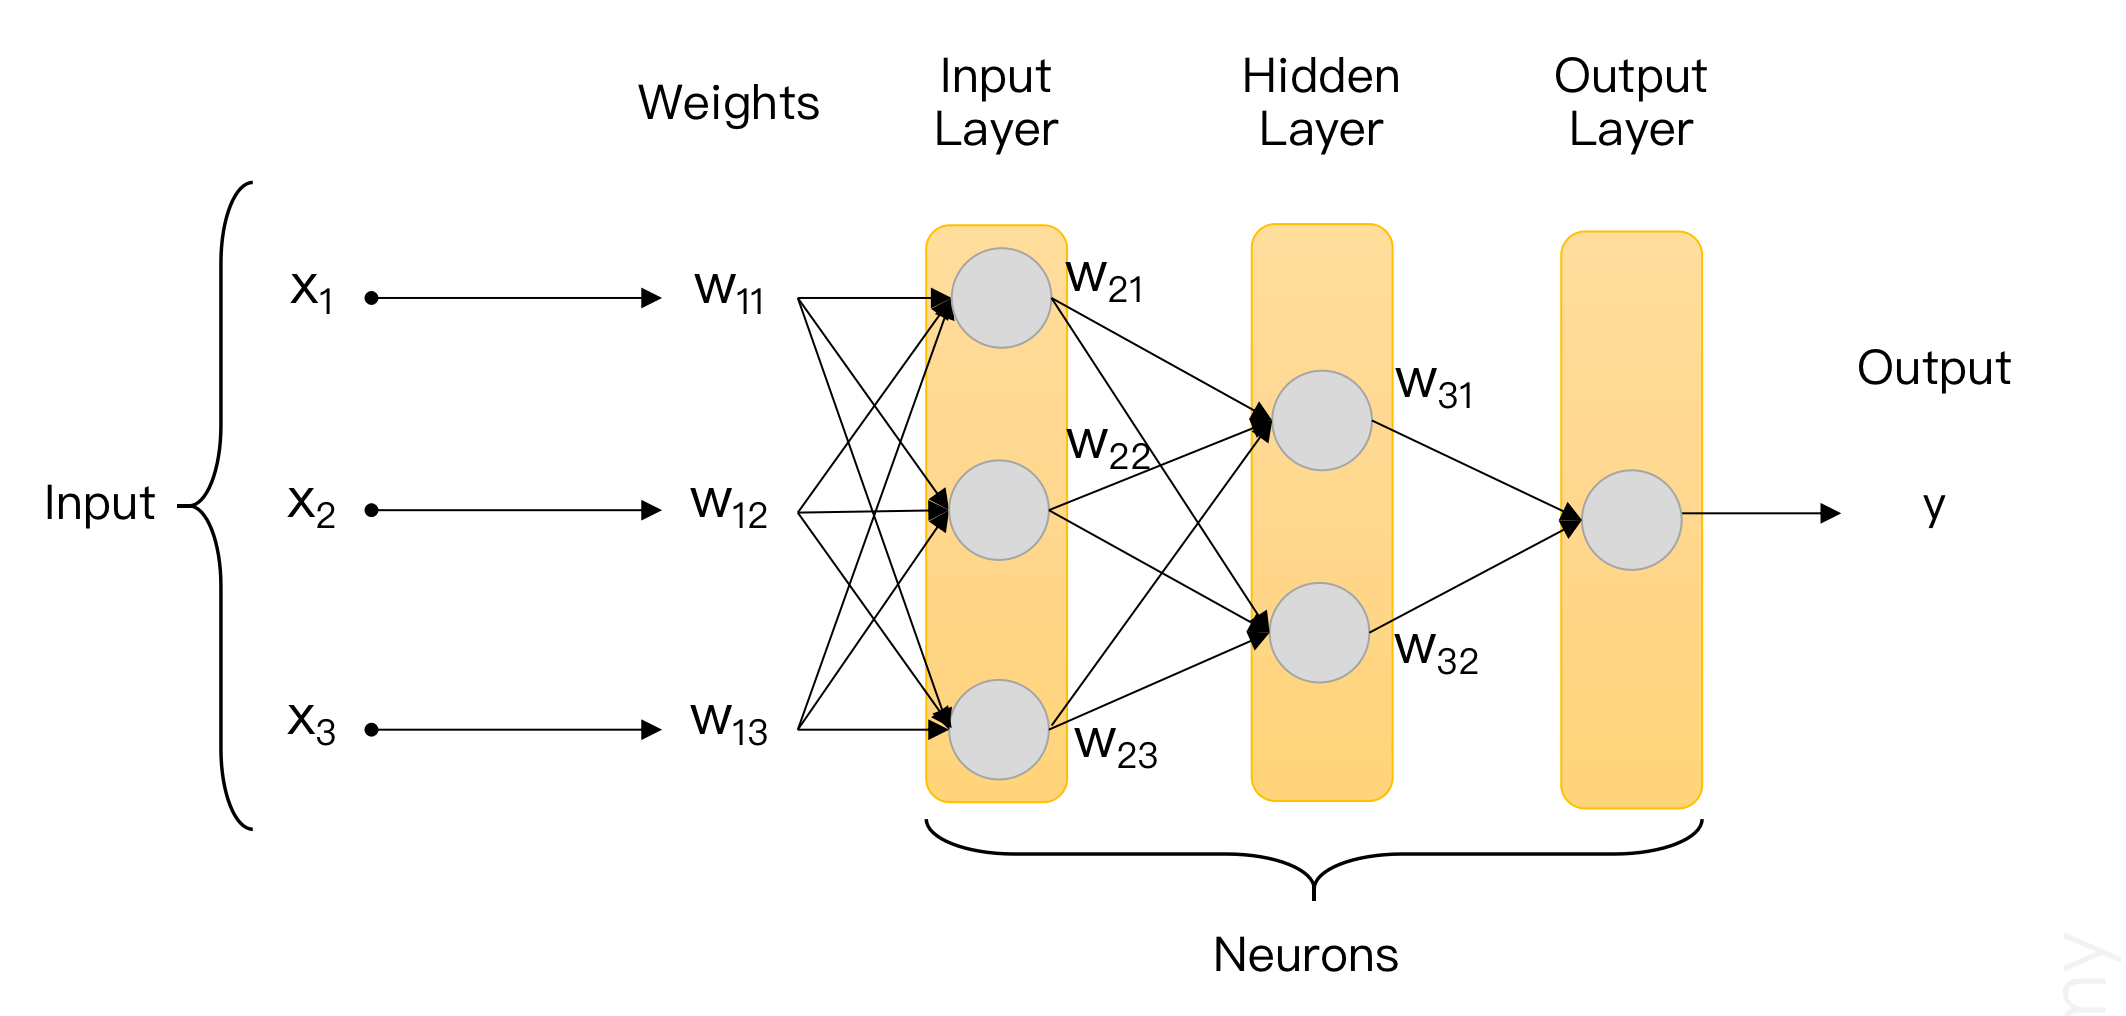

In [ ]:
class FeedforwardNetwork(nn.Module):
  def __init__(self, in_features, hidden_features):
      super(FeedforwardNetwork, self).__init__()

      # Input Layer 
      self.input_layer = nn.Linear(in_features, hidden_features)
      self.relu = nn.ReLU()

      # Hidden Layer
      self.hidden_linear = nn.Linear(hidden_features, 1)
      self.sigmoid = nn.Sigmoid()
  
  def forward(self, x):
      
      # Forward input layer
      h = self.input_linear(x)
      h = self.relu(h)

      # Forward hidden layer
      h = self.hidden_linear(h)
      out = self.sigmoid(h)
      
      return out

## Sequential Modules

In [ ]:
class FeedforwardNetworkSequential(nn.Module):
  def __init__(self, in_features, hidden_features):
      super(FeedforwardNetworkSequential, self).__init__()

      self.net = nn.Sequential(
                                nn.Linear(in_features, hidden_features),
                                nn.ReLU(),
                                nn.Linear(hidden_features, 1),
                                nn.Sigmoid()
                              )
  
  def forward(self, x):
      
      return self.net(x)

## Dynamic Modules

In [ ]:
class FeedforwardNetworkDynamic(nn.Module):
  def __init__(self, in_features, out_features, layers):
      super(FeedforwardNetworkDynamic, self).__init__()
      
      linear_list = []
      act_function_list = []
      for i in range(layers):
        hidden_features = in_features // 2
        linear_list.append(nn.Linear(in_features, hidden_features))
        act_function_list.append(nn.ReLU())
        in_features = hidden_features
      
      linear_list.append(nn.Linear(hidden_features, out_features))

      self.linear_list = nn.ModuleList(linear_list)
      self.act_function_list = nn.ModuleList(act_function_list)
      self.sigmoid = nn.Sigmoid()

  
  def forward(self, x):
      
      for linear, act_func in zip(self.linear_list, self.act_function_list):
        x = linear(x)
        x = act_func(x)
      
      out = self.sigmoid(x)

      return out

## Custom Module



In [ ]:
class CustomModule(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        #
        #
        #

    def forward(self, x):
        
        #
        #
        #

        return


example taken from https://torchtutorialstaging.z5.web.core.windows.net/beginner/examples_nn/polynomial_module.html

Polinomial:      a + bx + cx^2 + dx^3


In [ ]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3


Example taken from https://pytorch.org/docs/stable/notes/modules.html#a-simple-custom-module

In [ ]:
class MyLinear(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = nn.Parameter(torch.randn(out_features))

  def forward(self, input):
    return (input @ self.weight) + self.bias    # @ compute a matrix multiplication

## Complex Architecture: VGG16

Source from: https://medium.com/@tioluwaniaremu/vgg-16-a-simple-implementation-using-pytorch-7850be4d14a1

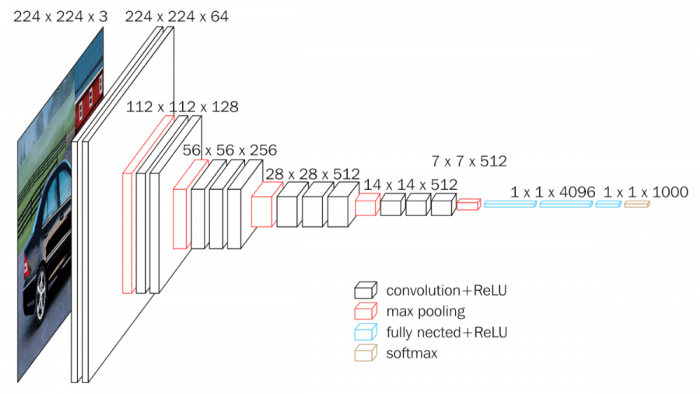

In [ ]:
from torch.nn import functional as F

class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

        self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.maxpool_1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.maxpool_2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.maxpool_3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.maxpool_4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.maxpool_5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(25088, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool_1(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxpool_2(x)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.maxpool_3(x)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.maxpool_4(x)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.maxpool_5(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5)
        x = self.fc3(x)
        return x

## Torch Summary

https://pypi.org/project/pytorch-model-summary/

In [ ]:
!pip install pytorch-model-summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### MyLinear

In [ ]:
model = MyLinear(10, 1).cpu()

summary(model, torch.zeros((30,10)), show_input=True, show_hierarchical=True,
        print_summary=True, show_parent_layers=True)

print()

---------------------------------------------------------------------------------------
   Parent Layers       Layer (type)         Input Shape         Param #     Tr. Param #
                         MyLinear-1            [30, 10]              11              11
Total params: 11
Trainable params: 11
Non-trainable params: 0
---------------------------------------------------------------------------------------


 Hierarchical Summary 

MyLinear(), 11 params






### Polinomial

In [ ]:
model = Polynomial3().cpu()

summary(model, torch.zeros((0)), show_input=True, show_hierarchical=False,
        print_summary=True, show_parent_layers=True)

print()

---------------------------------------------------------------------------------------
   Parent Layers       Layer (type)         Input Shape         Param #     Tr. Param #
                      Polynomial3-1                 [0]               4               4
Total params: 4
Trainable params: 4
Non-trainable params: 0
---------------------------------------------------------------------------------------



### Dynamic

In [ ]:
model = FeedforwardNetworkDynamic(100,1,5).cpu()

summary(model, torch.zeros((30,100)), show_input=True, show_hierarchical=True,
        print_summary=True)

print()

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          Linear-1           [30, 100]           5,050           5,050
            ReLU-2            [30, 50]               0               0
          Linear-3            [30, 50]           1,275           1,275
            ReLU-4            [30, 25]               0               0
          Linear-5            [30, 25]             312             312
            ReLU-6            [30, 12]               0               0
          Linear-7            [30, 12]              78              78
            ReLU-8             [30, 6]               0               0
          Linear-9             [30, 6]              21              21
           ReLU-10             [30, 3]               0               0
        Sigmoid-11             [30, 3]               0               0
Total params: 6,736
Trainable params: 6,736
Non-trainable params: 0
--------

### Sequential

In [ ]:
model = FeedforwardNetworkSequential(100,10).cpu()

summary(model, torch.zeros((30,100)), show_input=True, show_hierarchical=True,
        print_summary=True)

print()

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          Linear-1           [30, 100]           1,010           1,010
            ReLU-2            [30, 10]               0               0
          Linear-3            [30, 10]              11              11
         Sigmoid-4             [30, 1]               0               0
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
-----------------------------------------------------------------------


=========================== Hierarchical Summary ===========================

FeedforwardNetworkSequential(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True), 1,010 params
    (1): ReLU(), 0 params
    (2): Linear(in_features=10, out_features=1, bias=True), 11 params
    (3): Sigmoid(), 0 params
  ), 1,021 params
), 1,021 params






### VGG16

In [ ]:
model = VGG16()

summary(model, torch.zeros((1,3,224,224)), show_input=True, show_hierarchical=True,
        print_summary=True)

print()


--------------------------------------------------------------------------
      Layer (type)            Input Shape         Param #     Tr. Param #
          Conv2d-1       [1, 3, 224, 224]           1,792           1,792
          Conv2d-2      [1, 64, 224, 224]          36,928          36,928
       MaxPool2d-3      [1, 64, 224, 224]               0               0
          Conv2d-4      [1, 64, 112, 112]          73,856          73,856
          Conv2d-5     [1, 128, 112, 112]         147,584         147,584
       MaxPool2d-6     [1, 128, 112, 112]               0               0
          Conv2d-7       [1, 128, 56, 56]         295,168         295,168
          Conv2d-8       [1, 256, 56, 56]         590,080         590,080
          Conv2d-9       [1, 256, 56, 56]         590,080         590,080
      MaxPool2d-10       [1, 256, 56, 56]               0               0
         Conv2d-11       [1, 256, 28, 28]       1,180,160       1,180,160
         Conv2d-12       [1, 512, 28,